In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## a) load/merge data and visualize logerror

In [2]:
# load data into DataFrames
train = pd.read_csv('train.csv')
properties = pd.read_csv('properties.csv')

# print(train)
M = train.merge(properties, on = 'id')
display(M)

# if logerror[i]>=np.percentile(logerror,1,99)

,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14366692,-0.1684,1/1/16,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015,239071.0,10153.02,NaN,NaN,NaN
1,14739064,-0.0030,1/2/16,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015,143230.0,2172.88,NaN,NaN,6.059040e+13
2,10854446,0.3825,1/3/16,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,55396.0,105954.0,2015,50558.0,1443.69,NaN,NaN,6.037140e+13
3,11672170,-0.0161,1/3/16,1.0,NaN,NaN,4.0,5.0,NaN,1.0,...,NaN,NaN,559040.0,1090127.0,2015,531087.0,13428.94,NaN,NaN,6.037260e+13
4,12524288,-0.0419,1/3/16,NaN,NaN,NaN,1.0,1.0,NaN,7.0,...,NaN,NaN,56233.0,70316.0,2015,14083.0,913.17,NaN,NaN,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,12756771,0.0658,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,65728.0,307167.0,2015,241439.0,4038.70,NaN,NaN,6.037550e+13
31721,11295458,-0.0294,12/30/16,1.0,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,40163.0,50203.0,2015,10040.0,1263.39,Y,15.0,6.037900e+13
31722,11308315,0.0070,12/30/16,1.0,NaN,NaN,3.0,5.0,NaN,4.0,...,NaN,NaN,248378.0,331525.0,2015,83147.0,6461.79,NaN,NaN,6.037900e+13
31723,11703478,0.0431,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,17520.0,39934.0,2015,22414.0,627.91,NaN,NaN,6.037230e+13


In [3]:
# eliminate outliers
logerrors = np.array(M['logerror'])
percentile_1 = np.percentile(logerrors,1)
percentile_99 = np.percentile(logerrors,99)

for i in range(M.shape[0]):
    if M.iloc[i]['logerror']<percentile_1:
        M.at[i, 'logerror'] = percentile_1
    if M.iloc[i]['logerror']>percentile_99:
        M.at[i, 'logerror'] = percentile_99
        
logerrors = np.array(M['logerror'])
# print(percentile_1)
# print(percentile_99)

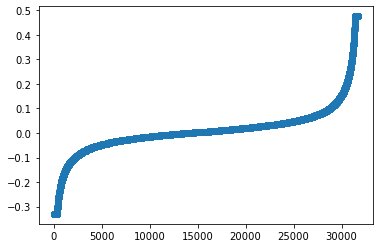

In [4]:
# scatter of logerr
sorted_m = M.copy().sort_values(by='logerror',ignore_index=True)
# print(sorted_m)
plt.scatter(sorted_m.index,sorted_m['logerror'])

(array([ 326.,   10.,   13.,    7.,    9.,    8.,   13.,   14.,   12.,
          14.,    7.,    9.,   13.,   10.,   13.,    6.,   14.,   22.,
          15.,   16.,   17.,   19.,   19.,   18.,   13.,   15.,   21.,
          23.,   32.,   10.,   20.,   34.,   19.,   32.,   25.,   24.,
          40.,   46.,   34.,   34.,   41.,   35.,   60.,   35.,   51.,
          39.,   60.,   68.,   59.,  101.,   55.,  101.,  104.,   72.,
         115.,   83.,  119.,  142.,  171.,  120.,  139.,  183.,  208.,
         186.,  238.,  275.,  258.,  342.,  350.,  318.,  461.,  483.,
         573.,  654.,  676.,  809.,  843.,  914., 1051., 1156., 1184.,
        1257., 1194., 1183., 1400., 1027.,  948.,  834.,  759.,  884.,
         635.,  549.,  505.,  437.,  497.,  387.,  324.,  354.,  263.,
         288.,  216.,  208.,  229.,  155.,  187.,  124.,  146.,  108.,
         120.,   92.,  102.,  112.,   66.,   70.,   94.,   64.,   82.,
          61.,   59.,   61.,   68.,   55.,   38.,   49.,   49.,   42.,
      

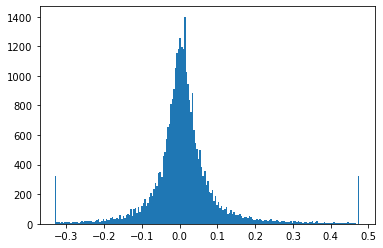

In [5]:
# histogram of logerr
plt.hist(logerrors, bins='auto')

## b) data cleaning

In [6]:
# build new data frame
column_name = pd.DataFrame(data = sorted_m.columns)
missing_count = np.zeros((len(column_name)))
i = 0

for i in range(len(column_name)):
    missing_count[i] = sorted_m.iloc[:,[i]].isna().sum()

Merged_data={'column_name': sorted_m.columns, 'missing_count': missing_count}
Merged_data = pd.DataFrame(data = Merged_data)
display(Merged_data)

Merged_data['missing ratio'] = Merged_data['missing_count']/len(sorted_m)
display(Merged_data)
    

,column_name,missing_count
0,id,0.0
1,logerror,0.0
2,transactiondate,0.0
3,airconditioningtypeid,21563.0
4,architecturalstyletypeid,31628.0
5,basementsqft,31711.0
6,bathroomcnt,0.0
7,bedroomcnt,0.0
8,buildingclasstypeid,31717.0
9,buildingqualitytypeid,11488.0


,column_name,missing_count,missing ratio
0,id,0.0,0.000000
1,logerror,0.0,0.000000
2,transactiondate,0.0,0.000000
3,airconditioningtypeid,21563.0,0.679685
4,architecturalstyletypeid,31628.0,0.996942
5,basementsqft,31711.0,0.999559
6,bathroomcnt,0.0,0.000000
7,bedroomcnt,0.0,0.000000
8,buildingclasstypeid,31717.0,0.999748
9,buildingqualitytypeid,11488.0,0.362112


In [7]:
# # fill missing data
for i in sorted_m.columns:
    if sorted_m[i].isnull().sum() == 0:
        continue
    else:
        try:
            sorted_m.loc[sorted_m[i].isnull(),i] = sorted_m[i].mean() 
        except:
            continue
display(sorted_m)


,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12345731,-0.329900,4/4/16,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,...,1.450479,1.0,35486.0,449534.0,2015,414048.0,5456.49,NaN,13.314845,6.037550e+13
1,11693554,-0.329900,3/17/16,1.809683,7.453608,670.571429,2.0,3.0,4.0,7.000000,...,1.450479,1.0,88272.0,205970.0,2015,117698.0,3084.56,NaN,13.314845,6.037230e+13
2,13892953,-0.329900,5/17/16,1.809683,7.453608,670.571429,5.0,4.0,4.0,5.570193,...,1.000000,1.0,1690188.0,4588556.0,2015,2898368.0,49167.84,NaN,13.314845,6.059060e+13
3,12190179,-0.329900,8/16/16,1.000000,7.453608,670.571429,1.0,2.0,4.0,7.000000,...,1.450479,1.0,12824.0,40545.0,2015,27721.0,2586.06,NaN,13.314845,6.037240e+13
4,11287325,-0.329900,2/1/16,1.000000,7.453608,670.571429,6.0,7.0,4.0,7.000000,...,1.450479,1.0,223200.0,279000.0,2015,55800.0,4818.04,NaN,13.314845,6.037900e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,17125774,0.475768,2/12/16,1.809683,7.453608,670.571429,1.5,3.0,4.0,5.570193,...,1.000000,1.0,52190.0,92958.0,2015,40768.0,1095.00,NaN,13.314845,6.111010e+13
31721,17049058,0.475768,9/8/16,1.809683,7.453608,670.571429,0.0,0.0,4.0,5.570193,...,1.450479,1.0,26079.0,84748.0,2015,58669.0,900.36,NaN,13.314845,6.111000e+13
31722,11509740,0.475768,3/9/16,1.809683,7.453608,670.571429,3.0,4.0,4.0,7.000000,...,1.450479,1.0,81260.0,2467116.0,2015,2385856.0,38408.12,NaN,13.314845,6.037620e+13
31723,11276875,0.475768,2/11/16,1.809683,7.453608,670.571429,2.0,4.0,4.0,7.000000,...,1.450479,1.0,82800.0,114641.0,2015,31841.0,2085.37,NaN,13.314845,6.037900e+13


## c) univariate analysis

<AxesSubplot:>

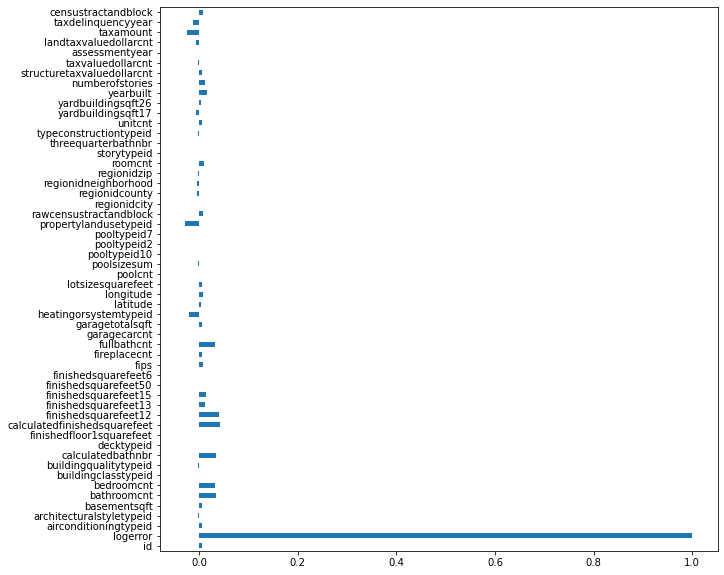

In [8]:
# make bar chart
sorted_m.corr().logerror.plot.barh(figsize=(10,10))
# plt.figure(figsize=(20,40))


# explain reason
There is no correlation between Id numbers and actual values that are being plotted on the bar plot.

## d) non-linear regression model

In [9]:
sorted_m = sorted_m.drop(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag','id','transactiondate'],axis=1)
display(sorted_m)
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,-0.329900,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,1.000000,66.0,...,374.852941,1947.000000,1.450479,35486.0,449534.0,2015,414048.0,5456.49,13.314845,6.037550e+13
1,-0.329900,1.809683,7.453608,670.571429,2.0,3.0,4.0,7.000000,2.000000,66.0,...,374.852941,1914.000000,1.450479,88272.0,205970.0,2015,117698.0,3084.56,13.314845,6.037230e+13
2,-0.329900,1.809683,7.453608,670.571429,5.0,4.0,4.0,5.570193,5.000000,66.0,...,374.852941,2005.000000,1.000000,1690188.0,4588556.0,2015,2898368.0,49167.84,13.314845,6.059060e+13
3,-0.329900,1.000000,7.453608,670.571429,1.0,2.0,4.0,7.000000,1.000000,66.0,...,374.852941,1920.000000,1.450479,12824.0,40545.0,2015,27721.0,2586.06,13.314845,6.037240e+13
4,-0.329900,1.000000,7.453608,670.571429,6.0,7.0,4.0,7.000000,6.000000,66.0,...,374.852941,1979.000000,1.450479,223200.0,279000.0,2015,55800.0,4818.04,13.314845,6.037900e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,0.475768,1.809683,7.453608,670.571429,1.5,3.0,4.0,5.570193,1.500000,66.0,...,374.852941,1954.000000,1.000000,52190.0,92958.0,2015,40768.0,1095.00,13.314845,6.111010e+13
31721,0.475768,1.809683,7.453608,670.571429,0.0,0.0,4.0,5.570193,2.305564,66.0,...,374.852941,1968.404068,1.450479,26079.0,84748.0,2015,58669.0,900.36,13.314845,6.111000e+13
31722,0.475768,1.809683,7.453608,670.571429,3.0,4.0,4.0,7.000000,3.000000,66.0,...,374.852941,1931.000000,1.450479,81260.0,2467116.0,2015,2385856.0,38408.12,13.314845,6.037620e+13
31723,0.475768,1.809683,7.453608,670.571429,2.0,4.0,4.0,7.000000,2.000000,66.0,...,374.852941,1956.000000,1.450479,82800.0,114641.0,2015,31841.0,2085.37,13.314845,6.037900e+13


In [10]:
# split and train
#  sorted_m.iloc[:,[i]].isna().sum()
# print(sorted_m.iloc[:,2:])
X_train,X_test,Y_train,Y_test = train_test_split(sorted_m.iloc[:,2:],sorted_m['logerror'] , test_size=0.3)
#sklearnfor split and train

clf = RandomForestRegressor()
clf.fit(X_train,Y_train)

pred = clf.predict(X_train)

0.0013909290323160844


<Figure size 720x720 with 0 Axes>

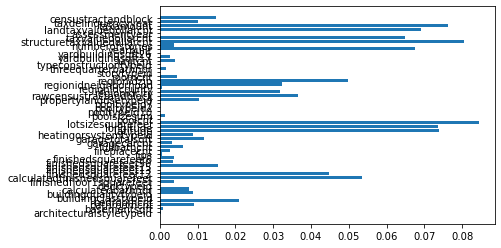

<Figure size 720x720 with 0 Axes>

In [11]:
# report importances and mse
MSE = mean_squared_error(Y_train,pred)
print(MSE)

plt.barh(sorted_m.iloc[:,2:].columns,clf.feature_importances_)
plt.figure(figsize = (10,10))



## e) KFold

In [12]:
from sklearn.model_selection import KFold
# KFold, k = 5

L = sorted_m.head(500)
kf = KFold(n_splits=5)
MSE_avg = 0
c = 0
for train_i,test_i in kf.split(L):
    
    X1_train,X1_test,Y1_train,Y1_test = train_test_split(L.iloc[:,2:],L['logerror'] , test_size=0.3,random_state = c)
    clf = RandomForestRegressor()
    clf.fit(X1_train,Y1_train)

    pred1 = clf.predict(X1_train)
    MSE1 = mean_squared_error(Y1_train,pred1)
    MSE_avg = MSE_avg + MSE1
    c += 1

print(MSE_avg/5)



6.940737378628776e-05


In [13]:
# Run d2 for 100 times
kf = KFold(n_splits=100)
MSE_avg = 0
c = 0
for train_i,test_i in kf.split(L):
    
    X1_train,X1_test,Y1_train,Y1_test = train_test_split(L.iloc[:,2:],L['logerror'] , test_size=0.3,random_state = c)
    clf = RandomForestRegressor()
    clf.fit(X1_train,Y1_train)

    pred1 = clf.predict(X1_train)
    MSE1 = mean_squared_error(Y1_train,pred1)
    print(MSE1)
    c += 1


7.336139799143061e-05
6.701461904000215e-05
6.625249475143038e-05
7.682681340285931e-05
6.314902770000196e-05
6.793425046857357e-05
7.203793668285909e-05
6.413095959143038e-05
7.42379198714302e-05
6.483372725143055e-05
6.564859485428785e-05
6.412948801143066e-05
6.896496077428761e-05
7.405231108285888e-05
7.279449308285892e-05
6.796221040857306e-05
6.557279329143035e-05
6.731333885143097e-05
7.091243674571628e-05
6.961793752285912e-05
6.597066078857323e-05
7.355049902571665e-05
6.811327126000178e-05
7.598065212285871e-05
6.903932685143052e-05
6.391322555428751e-05
7.64266383485732e-05
6.3300385640002e-05
7.417243182000199e-05
7.226474216000192e-05
7.200239392571619e-05
6.932867844857339e-05
6.622811922000175e-05
6.688536858571602e-05
6.845962937143076e-05
6.691941625143035e-05
7.716583420857342e-05
7.601370644285952e-05
6.685828213143054e-05
7.134936277428754e-05
6.460149204571594e-05
6.580075959714464e-05
7.259950031428803e-05
6.506453895143018e-05
6.866219810857325e-05
6.952866907428

Cross validation makes the model understanding more accurate.